# **Data Cleaning Notebook**

## Objectives

* Evaluate missing data
* Clean data

## Inputs

* outputs/datasets/collection/BTCDaily.csv 

## Outputs

* outputs/datasets/cleaned/BTCClean.csv


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/bitcoin-forecast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/bitcoin-forecast'

# Load data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BTCDaily.csv"))
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
1,2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2,2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
3,2014-12-01,376.40,382.31,373.03,378.39,2520662.37,6660.56
4,2014-12-02,378.39,382.86,375.23,379.25,2593576.46,6832.53


Convert the 'date' variable to datetime format and set it as the index

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()
df.set_index('date', inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   open        2651 non-null   float64       
 2   high        2651 non-null   float64       
 3   low         2651 non-null   float64       
 4   close       2651 non-null   float64       
 5   Volume BTC  2651 non-null   float64       
 6   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 145.1 KB


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
2014-12-01,376.40,382.31,373.03,378.39,2520662.37,6660.56
2014-12-02,378.39,382.86,375.23,379.25,2593576.46,6832.53


# Data Exploration

Using df.describe(), we identified zero volume entries in the Volume BTC and Volume USD columns.

In [6]:
df.describe()

,open,high,low,close,Volume BTC,Volume USD
count,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


Missing and infinite values are checked, with none found.

In [8]:
import numpy as np

missing_values = df.isna().sum()
inf_values = df.isin([np.inf, -np.inf]).sum()

print("Missing Values:\n", missing_values)
print("\nInfinite Values:\n", inf_values)

Missing Values:
 open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

Infinite Values:
 open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


# Correlation and PPS Analysis

We calculate and visualize the correlation between features in the dataset using Spearman and Pearson methods, as well as the Power Predictive Score (PPS), based on concepts learned in the course and walkthrough project.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Calculate Correlations and Power Predictive Score

In [10]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min    25%   50%    75%    max
ppscore   30.0  0.446  0.431  0.0  0.121  0.16  0.958  0.969


Display of Heatmaps:
- The threshold of 0.4 is chosen to balance capturing features with moderate predictive power while excluding those with minimal relevance, based on the mean and distribution of the PPS scores.



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



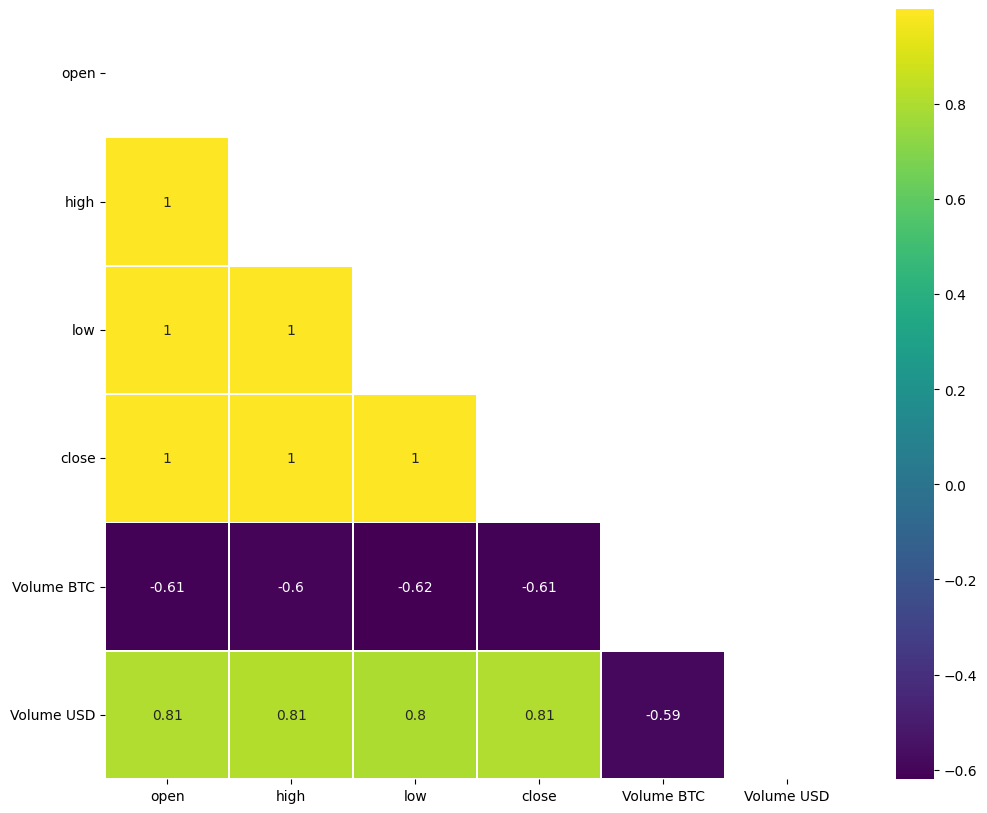



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



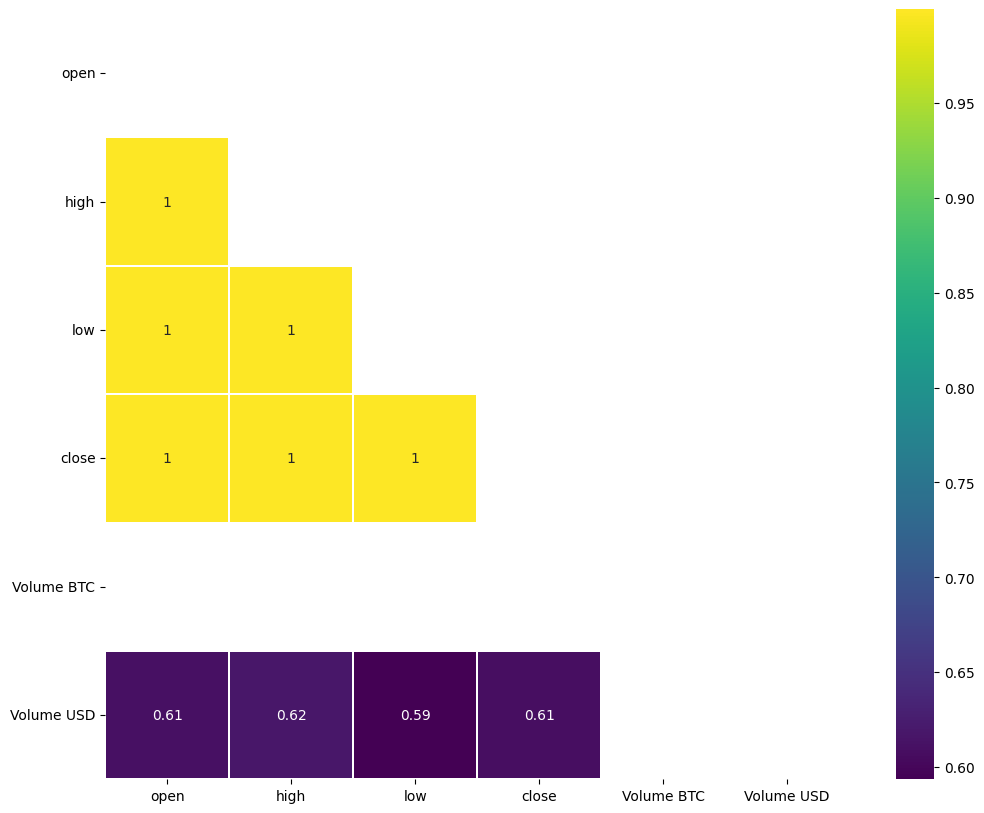



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



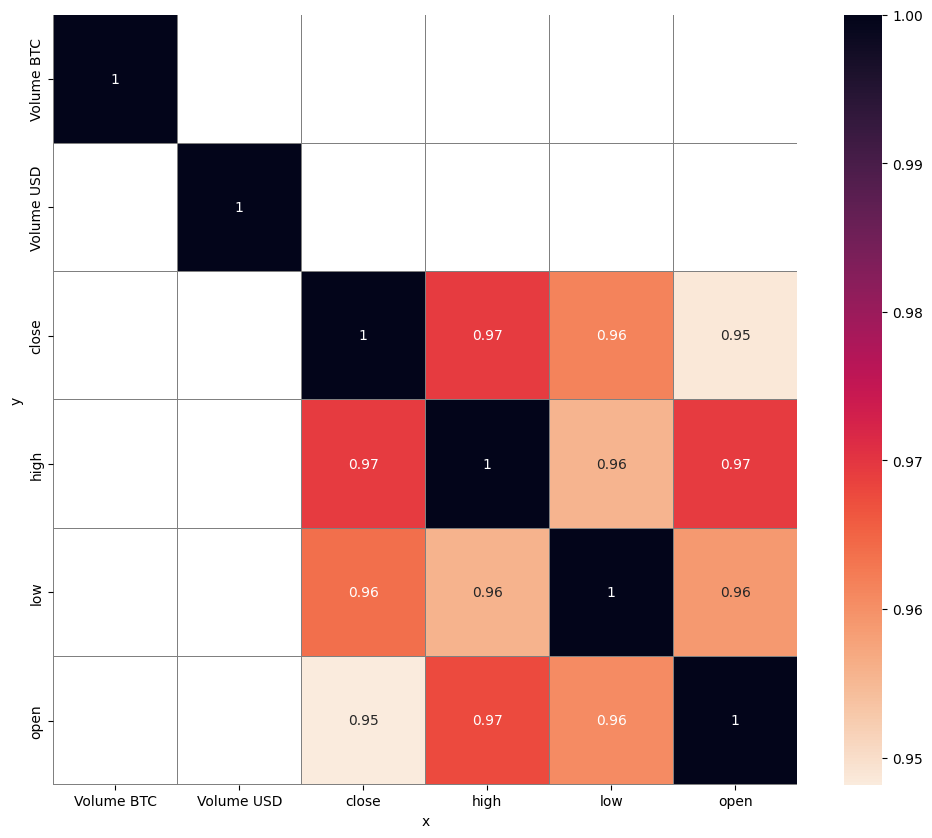

In [11]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

# Save cleaned DataFrame

In [13]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') 
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/cleaned/BTCClean2.csv")

[Errno 17] File exists: 'outputs/datasets/cleaned'


# Conclusions and Next Steps

**Data Quality**:
The dataset contains no missing values. The only anomaly identified is a day with zero trading volume, likely indicating a non-trading day, which does not require further action.

**Feature Correlation**:

- There is a strong correlation among the features: open, close, high, and low prices.
- Volume in USD shows a good correlation with the price features.
- Volume in BTC exhibits a negative correlation with the price features, indicating that as the price increases, the trading volume in BTC decreases.

**No Further Manipulations Needed**:
Given the quality of the data and the findings from the correlation and PPS analysis, no further data manipulations are necessary at this stage.

**Focus on Feature Engineering**:
In the upcoming notebook, I will focus on adding new features to enhance predictive modeling.